In [3]:
import pandas as pd
def get_agri_daily_dataset_df():
    df = pd.read_csv('data/met_data_Kismacs_2013.csv').iloc[:-1]    
    df2= df.groupby(['év','hónap','nap']).mean()
    return df2
data = get_agri_daily_dataset_df()
data

/tmp/ipykernel_33603/2477506637.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/met_data_Kismacs_2013.csv').iloc[:-1]


óra       perc  hőmérséklet 1m  hőmérséklet 2m  \
év   hónap nap                                                         
2013 1.0   1.0   11.58042  25.174825       -4.437762       -4.516783   
           2.0   11.50000  25.000000       -4.343056       -4.415972   
           3.0   11.50000  25.000000       -0.837500       -0.845833   
           4.0   11.50000  25.000000        1.897917        1.997917   
           5.0   11.50000  25.000000        2.195139        2.245833   
...                   ...        ...             ...             ...   
     12.0  28.0  11.50000  25.000000        3.181944        3.690972   
           29.0  11.50000  25.000000        2.712500        3.113194   
           30.0  11.50000  25.000000        4.176389        4.322917   
           31.0  11.50000  25.000000        1.683333        1.666667   
2014 1.0   1.0    0.00000   0.000000        1.300000        1.200000   

                 hőmérséklet 4m  hőmérséklet 10m  légnedvesség 1m  \
év   hónap nap                                                      
2013 1.0   1.0        -4.583217        -4.640559        95.648252   
           2.0        -4.477083        -4.523611        95.563889   
           3.0        -0.938194        -0.876389        98.525694   
           4.0         2.063889         2.262500        94.739583   
           5.0         2.311806         2.472222        83.575000   
...                         ...              ...              ...   
     12.0  28.0        4.265972         5.007639        92.734028   
           29.0        3.642361         4.445833        88.688889   
           30.0        4.526389         4.765972        81.355556   
           31.0        1.660417         1.681250        95.850000   
2014 1.0   1.0         1.200000         1.200000        98.100000   

                 légnedvesség 2m  légnedvesség 4m  légnedvesség 10m  ...  \
év   hónap nap                                                       ...   
2013 1.0   1.0         97.172028        95.711189         96.231469  ...   
           2.0         96.781250        95.659722         95.900694  ...   
           3.0         99.515278        98.830556         98.779861  ...   
           4.0         96.054167        94.580556         94.079861  ...   
           5.0         84.342361        82.111111         81.272917  ...   
...                          ...              ...               ...  ...   
     12.0  28.0        92.497222        93.085417         89.532639  ...   
           29.0        88.932639        89.178472         87.351389  ...   
           30.0        81.583333        80.419444         79.173611  ...   
           31.0        96.388889        97.481944         96.220139  ...   
2014 1.0   1.0         98.600000        99.800000         99.500000  ...   

                 talajnedv. kb. -5 cm 2  talajhőáram kb. -5 cm 1  \
év   hónap nap                                                     
2013 1.0   1.0                 0.262378                -9.000000   
           2.0                 0.246458                -9.000000   
           3.0                 0.241181                -9.000000   
           4.0                 0.254097                -9.000000   
           5.0                 0.273542                -9.000000   
...                                 ...                      ...   
     12.0  28.0                0.281389                 4.758333   
           29.0                0.280000                 8.747917   
           30.0                0.280000                 3.244444   
           31.0                0.280000                 2.717361   
2014 1.0   1.0                 0.280000                 3.600000   

                 talajhőáram kb. -5 cm 2  talajhőáram kb. -5 cm 3  \
év   hónap nap                                                      
2013 1.0   1.0                 -8.900000               -11.400000   
           2.0                 -8.900000               -11.400000   
           3.0                 -8.900

óra


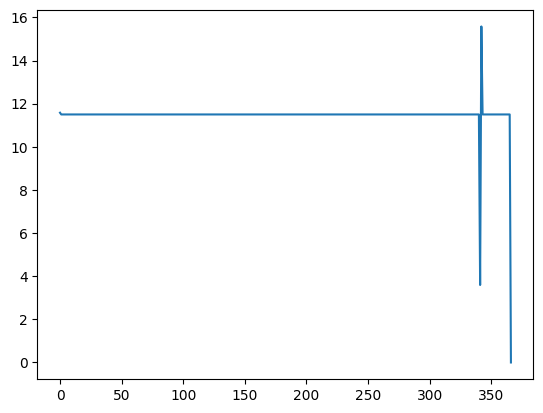

perc


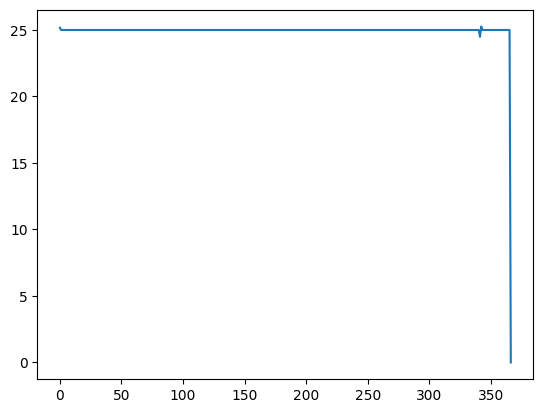

hőmérséklet 1m


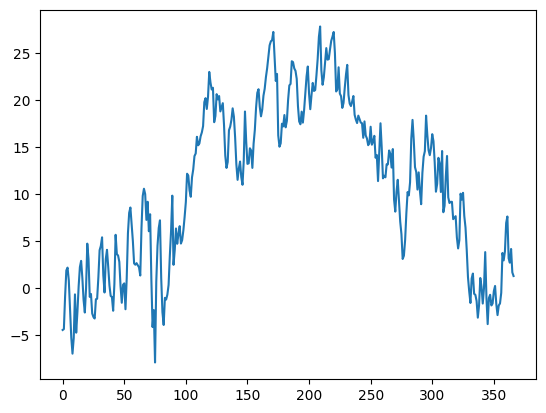

hőmérséklet 2m


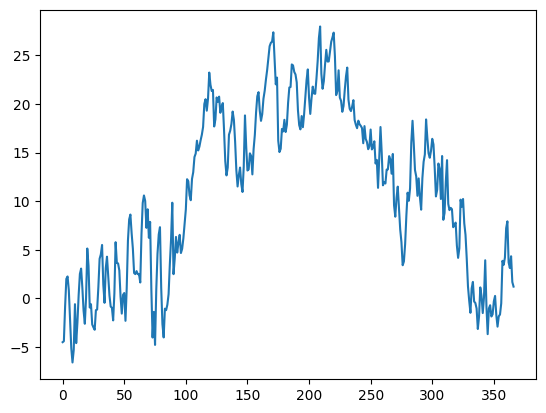

hőmérséklet 4m


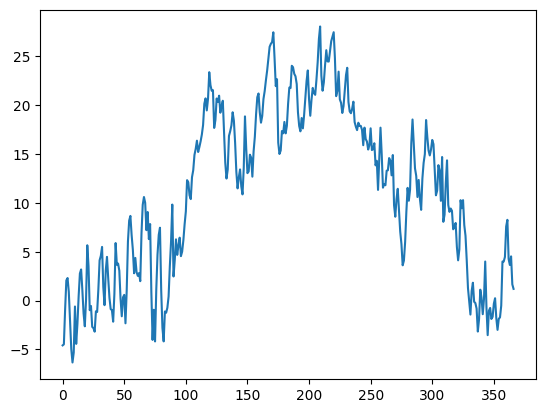

hőmérséklet 10m


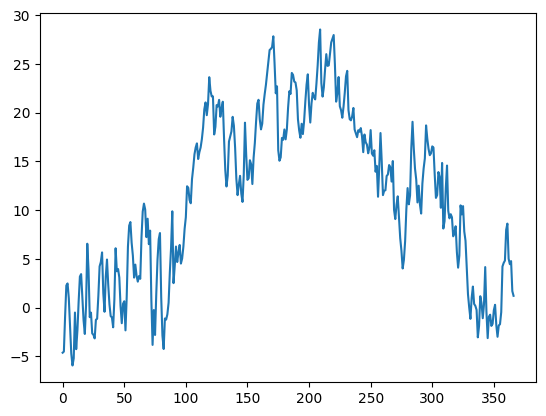

légnedvesség 1m


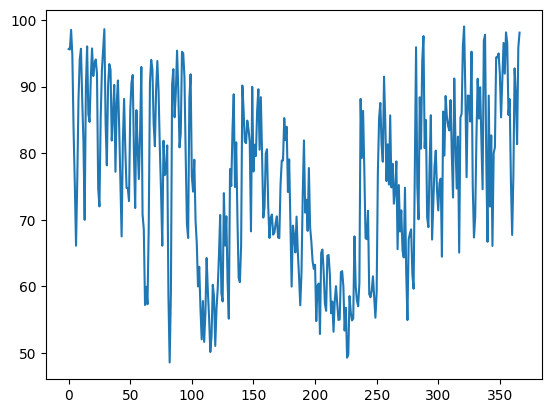

légnedvesség 2m


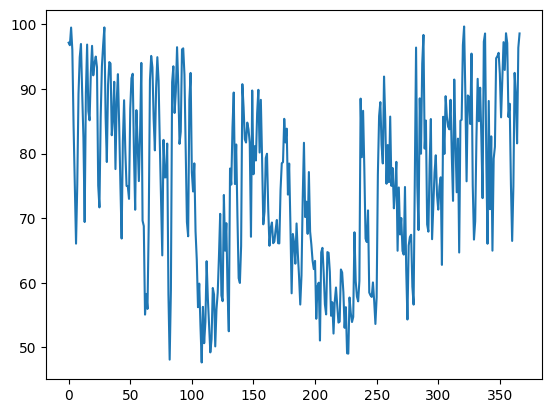

légnedvesség 4m


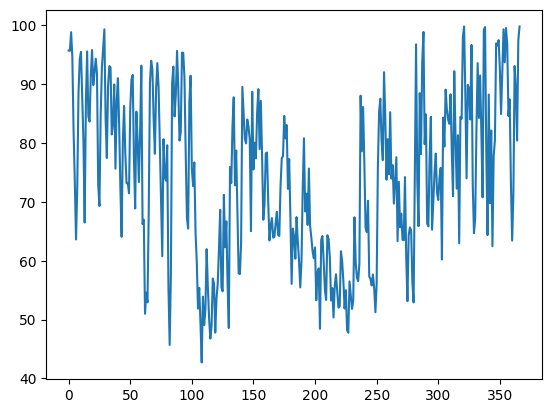

légnedvesség 10m


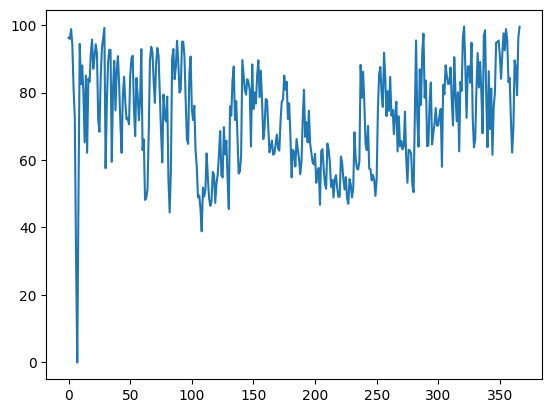

szélsebesség 1m


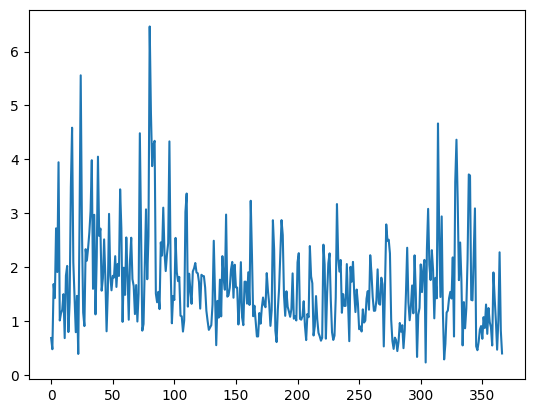

szélsebesség 2m


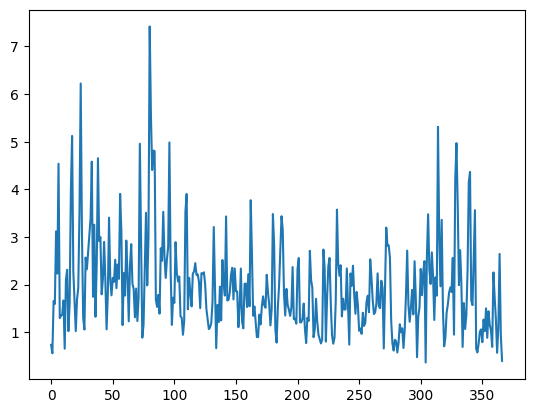

szélsebesség 4m


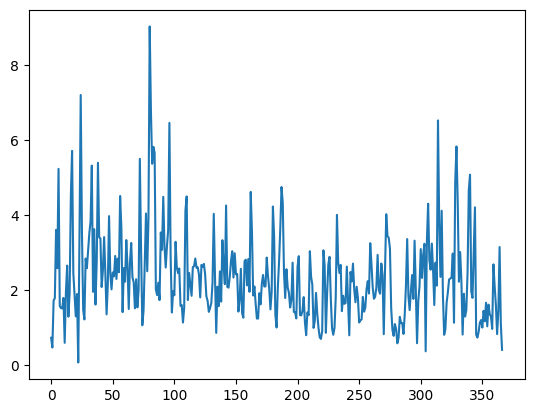

szélsebesség 10m


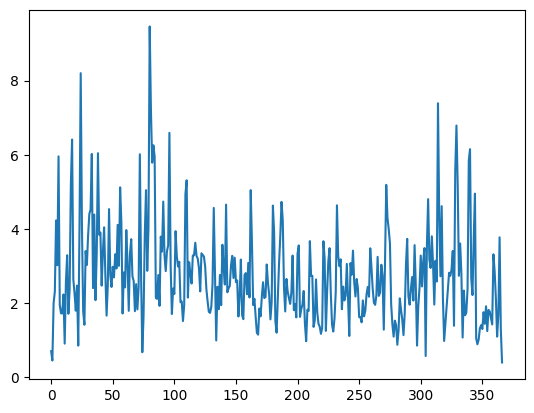

sugárzás glob.


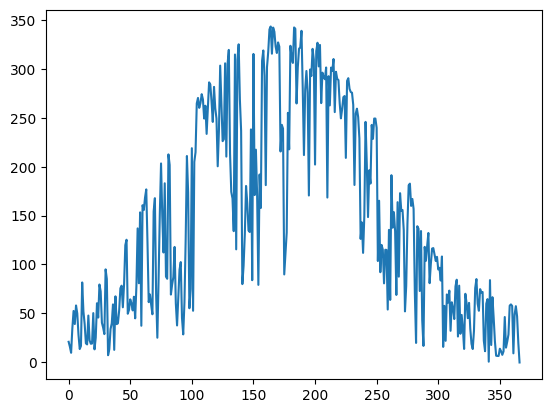

sugárzás refl.


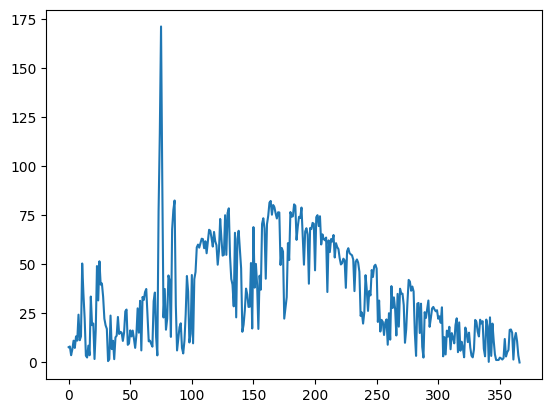

sugárzás visug


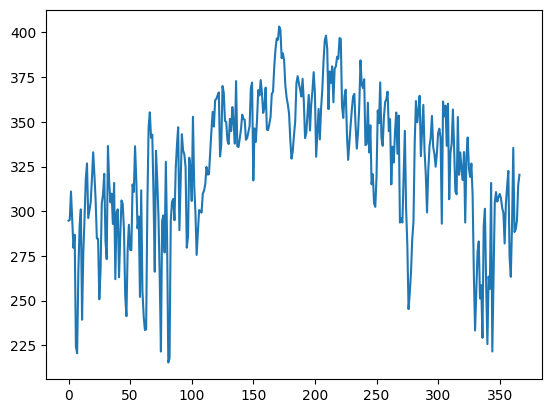

sugárzás kisug


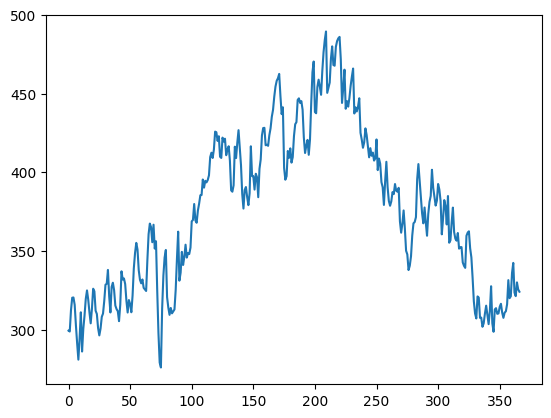

sugárzás egyen


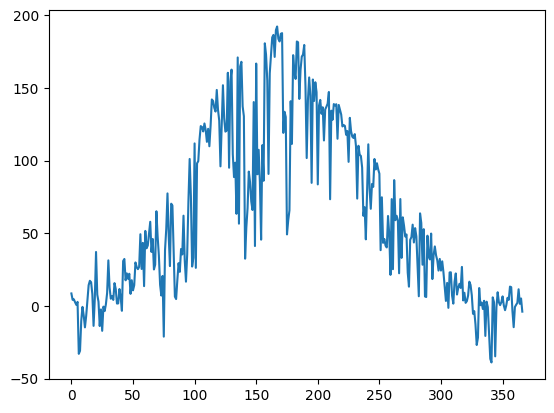

sugárzás infra


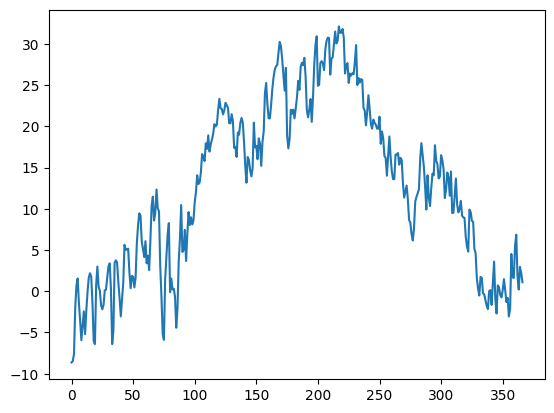

?1


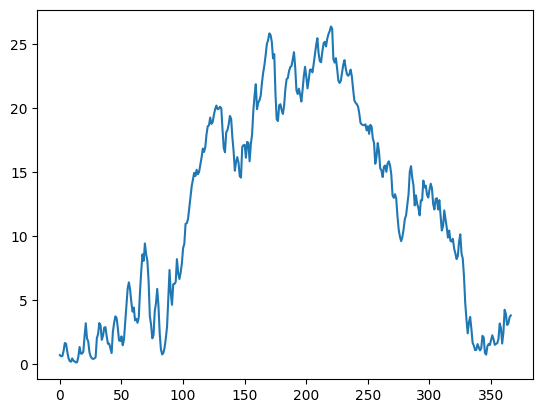

?2


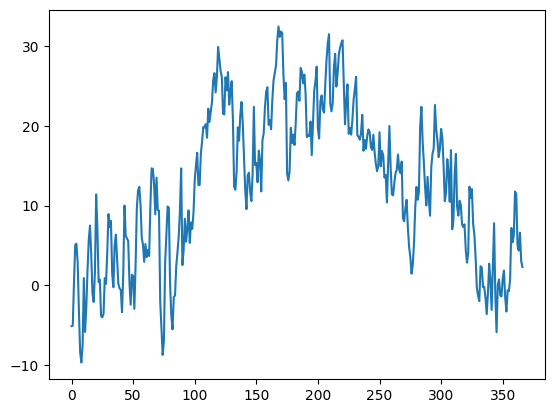

talajnedv. kb. -5 cm 1


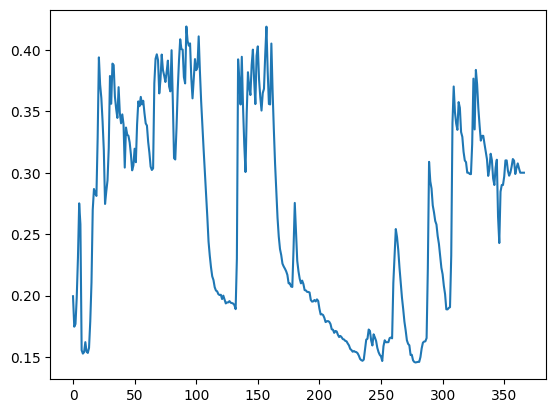

talajnedv. kb. -5 cm 2


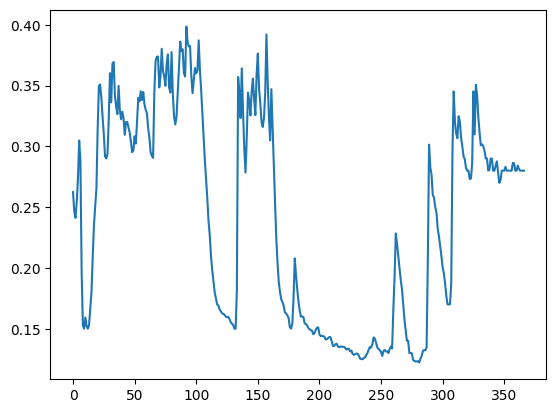

talajhőáram kb. -5 cm 1


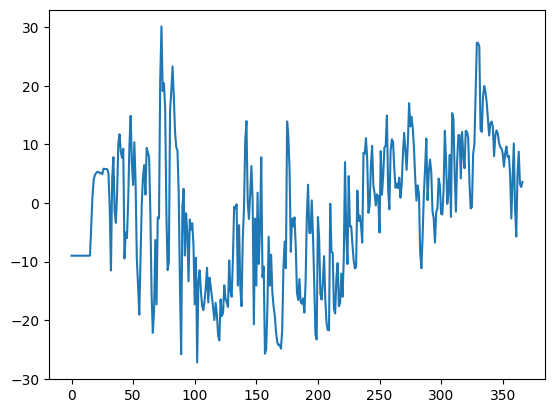

talajhőáram kb. -5 cm 2


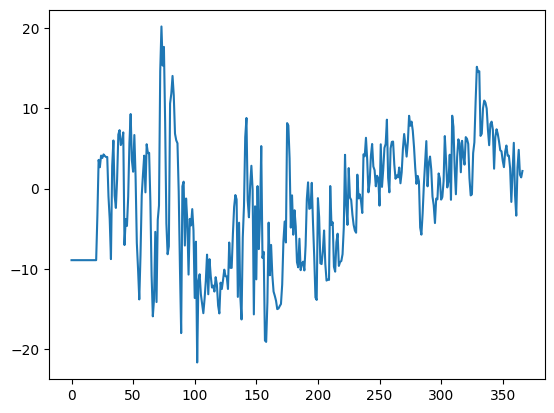

talajhőáram kb. -5 cm 3


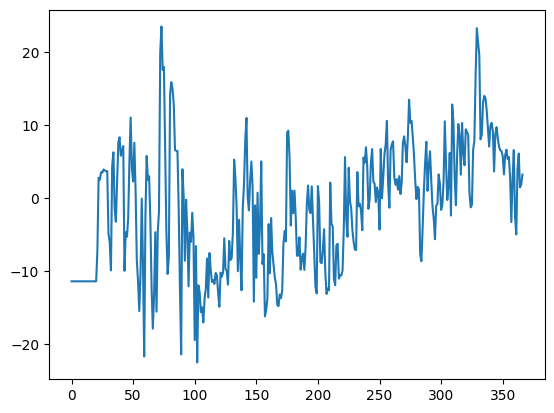

csapadék sum


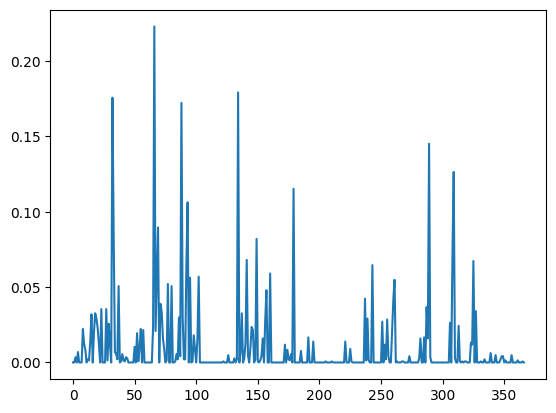

csapadék 2


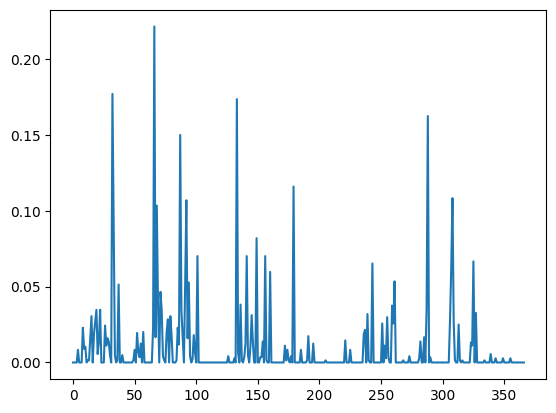

csapadék 3


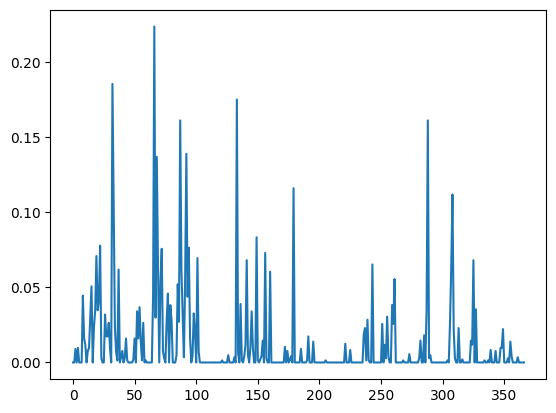

csapadék 4


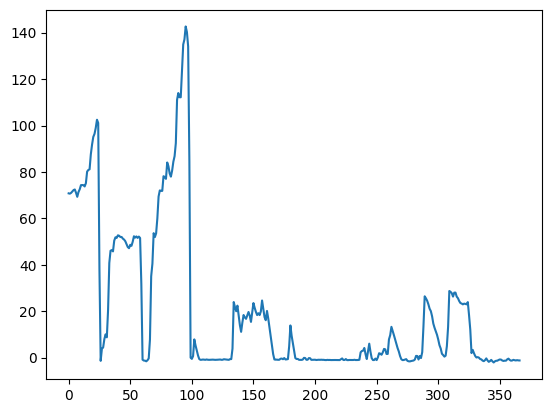

csapadék sta


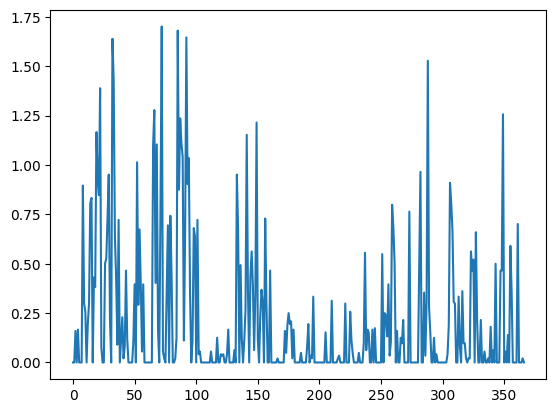

szélir.


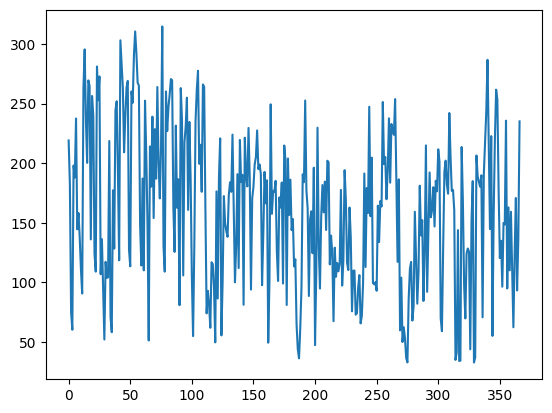

In [34]:
import matplotlib.pylab as plt
for col in data.columns:
    print(col)
    plt.plot(data[col].values)
    plt.show()

In [4]:
def get_agri_daily_dataset(test_percent = 20):
    res = {}
    df = pd.read_csv('data/met_data_Kismacs_2013.csv').iloc[:-1]    
    df2= df.groupby(['év','hónap','nap']).mean()    

    df2= df2.drop('óra',axis=1) 
    df2= df2.drop('perc',axis=1) 
    
    split_pos = int((len(df2.index)*(100-test_percent))/100)
    
    for col in df2.columns:
        traintests = (pd.Series(df2[col].iloc[:split_pos], dtype='float32'),pd.Series(df2[col].iloc[split_pos:], dtype='float32')) 
        res[col] = traintests
    return res
    
get_agri_daily_dataset()


/tmp/ipykernel_33603/650373314.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/met_data_Kismacs_2013.csv').iloc[:-1]


{'hőmérséklet 1m': (év    hónap  nap 
  2013  1.0    1.0     -4.437762
               2.0     -4.343056
               3.0     -0.837500
               4.0      1.897917
               5.0      2.195139
                         ...    
        10.0   16.0    10.495139
               17.0    12.319445
               18.0    10.357639
               19.0     8.936111
               20.0    12.259722
  Name: hőmérséklet 1m, Length: 293, dtype: float32,
  év    hónap  nap 
  2013  10.0   21.0    13.984722
               22.0    14.570139
               23.0    18.355556
               24.0    16.315277
               25.0    14.686806
                         ...    
        12.0   28.0     3.181944
               29.0     2.712500
               30.0     4.176389
               31.0     1.683333
  2014  1.0    1.0      1.300000
  Name: hőmérséklet 1m, Length: 74, dtype: float32),
 'hőmérséklet 2m': (év    hónap  nap 
  2013  1.0    1.0     -4.516783
               2.0     -4.415972
      

In [2]:
 df2.columns

NameError: name 'df2' is not defined

In [11]:
df = pd.read_csv('data/met_data_Kismacs_2013.csv').iloc[:-1]    
df2= df.groupby(['év','hónap','nap']).mean()
df2['date'] = df2['év'] * 10000
    

/tmp/ipykernel_10495/2920998018.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/met_data_Kismacs_2013.csv').iloc[:-1]


KeyError: 'év'

In [12]:
df2.columns

Index(['óra', 'perc', 'hőmérséklet 1m', 'hőmérséklet 2m', 'hőmérséklet 4m',
       'hőmérséklet 10m', 'légnedvesség 1m', 'légnedvesség 2m',
       'légnedvesség 4m', 'légnedvesség 10m', 'szélsebesség 1m',
       'szélsebesség 2m', 'szélsebesség 4m', 'szélsebesség 10m',
       'sugárzás glob.', 'sugárzás refl.', 'sugárzás visug', 'sugárzás kisug',
       'sugárzás egyen', 'sugárzás infra', '?1', '?2',
       'talajnedv. kb. -5 cm 1', 'talajnedv. kb. -5 cm 2',
       'talajhőáram kb. -5 cm 1', 'talajhőáram kb. -5 cm 2',
       'talajhőáram kb. -5 cm 3', 'csapadék sum', 'csapadék 2', 'csapadék 3',
       'csapadék 4', 'csapadék sta', 'szélir.'],
      dtype='object')

In [35]:
[ a for (a,b,c)  in df2.index]

[2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,